In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [17]:
# Load image in grayscale
img = cv2.imread(r"C:\Users\bbuser\Downloads\beautiful_mountain.jpg", cv2.IMREAD_GRAYSCALE)

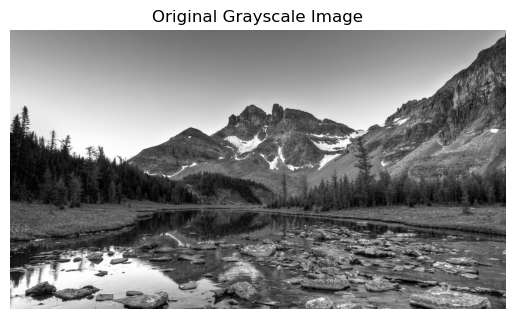

Shape: (1080, 1920)
Data type: uint8
Pixel range: min = 0 , max = 255


In [18]:
# 1. View grayscale image and basic info
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

print("Shape:", img.shape)
print("Data type:", img.dtype)
print("Pixel range: min =", img.min(), ", max =", img.max())

# Brighten the Image

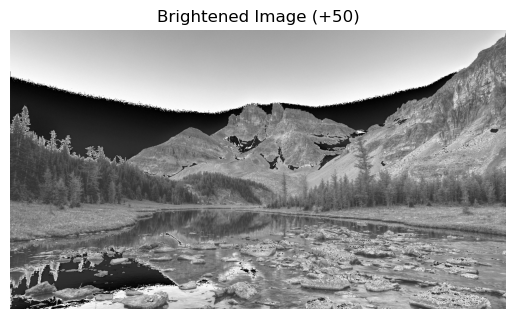

In [19]:
bright_img = img + 50  # May overflow!
plt.imshow(bright_img, cmap='gray')
plt.title("Brightened Image (+50)")
plt.axis('off')
plt.show()


# Brighten Safely with Clipping

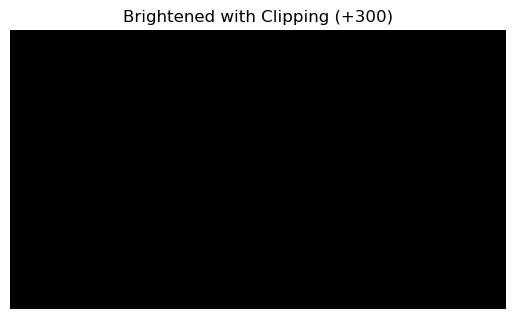

In [29]:
# Ensure the image is in larger int type to handle overflow safely
bright_img_clip = np.clip(img.astype(np.int16) + 300, 0, 255).astype(np.uint8)

plt.imshow(bright_img_clip, cmap='gray')
plt.title("Brightened with Clipping (+300)")
plt.axis('off')
plt.show()

# Darken the Image

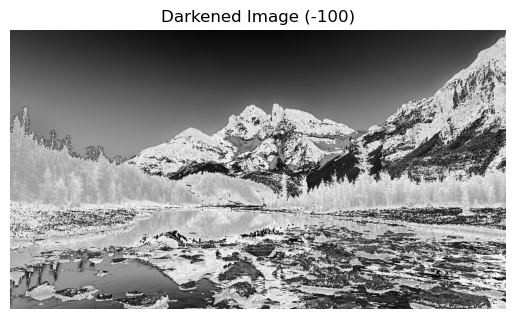

In [21]:
dark_img = np.clip(img - 100, 0, 255).astype(np.uint8)
plt.imshow(dark_img, cmap='gray')
plt.title("Darkened Image (-100)")
plt.axis('off')
plt.show()


# Transpose the Image

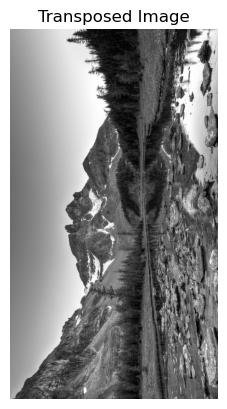

In [22]:
transposed = img.T
plt.imshow(transposed, cmap='gray')
plt.title("Transposed Image")
plt.axis('off')
plt.show()


# Flip Image Horizontally and Vertically

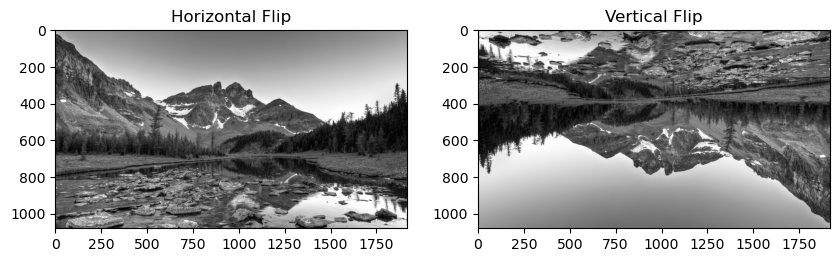

In [23]:
h_flip = np.fliplr(img)
v_flip = np.flipud(img)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(h_flip, cmap='gray')
plt.title("Horizontal Flip")

plt.subplot(1, 2, 2)
plt.imshow(v_flip, cmap='gray')
plt.title("Vertical Flip")
plt.show()


# Crop 100x100 from Center

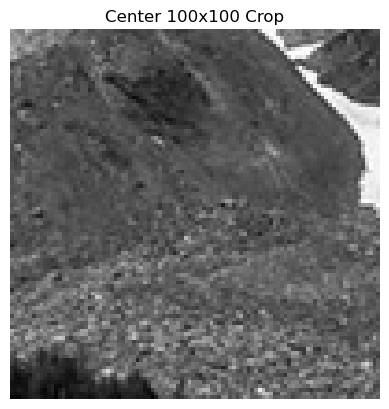

In [24]:
h, w = img.shape
center_crop = img[h//2-50:h//2+50, w//2-50:w//2+50]
plt.imshow(center_crop, cmap='gray')
plt.title("Center 100x100 Crop")
plt.axis('off')
plt.show()


# Negative Image

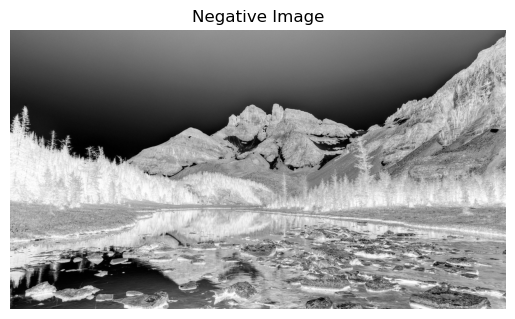

In [25]:
negative = 255 - img
plt.imshow(negative, cmap='gray')
plt.title("Negative Image")
plt.axis('off')
plt.show()


# Rotate Image (90 degrees)

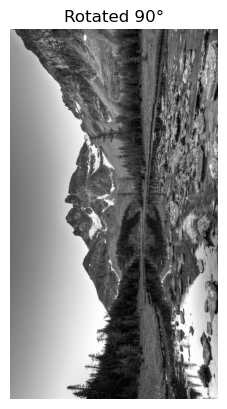

In [26]:
rotated = np.rot90(img, k=1)  # Try k=1, 2, -1
plt.imshow(rotated, cmap='gray')
plt.title("Rotated 90°")
plt.axis('off')
plt.show()


# Combine Transformations

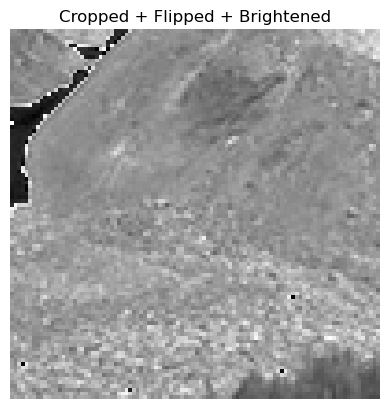

In [27]:
combo = np.clip(np.fliplr(center_crop) + 50, 0, 255).astype(np.uint8)
plt.imshow(combo, cmap='gray')
plt.title("Cropped + Flipped + Brightened")
plt.axis('off')
plt.show()


# Bonus: Collage

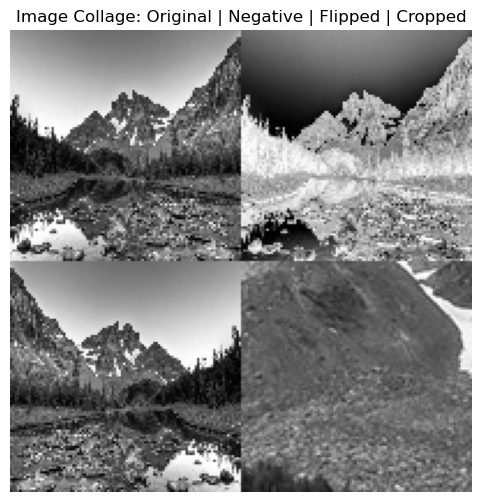

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load original image in grayscale
img = cv2.imread(r"C:\Users\bbuser\Downloads\beautiful_mountain.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Negative image
negative = 255 - img

# 3. Flipped image (horizontally)
flipped = np.fliplr(img)

# 4. Cropped image (center 100x100)
h, w = img.shape
center_crop = img[h//2 - 50 : h//2 + 50, w//2 - 50 : w//2 + 50]

# 5. Downsampled image
downsampled = img[::2, ::2]

# --- Resize all to same shape for collage ---

# Target shape for collage blocks (100x100)
target_shape = (100, 100)

# Resize all to 100x100 using OpenCV
negative_resized = cv2.resize(negative, target_shape)
flipped_resized = cv2.resize(flipped, target_shape)
downsampled_resized = cv2.resize(downsampled, target_shape)
original_resized = cv2.resize(img, target_shape)
center_crop_resized = cv2.resize(center_crop, target_shape)

# Arrange in a 2×2 grid collage (or horizontal/vertical)
row1 = np.hstack((original_resized, negative_resized))
row2 = np.hstack((flipped_resized, center_crop_resized))
row3 = np.hstack((downsampled_resized, original_resized))  # optional extra row

# Final collage (2x2 or 3x2 grid)
collage = np.vstack((row1, row2))  # 2x2 layout
# collage = np.vstack((row1, row2, row3))  # 3x2 layout (if desired)

# Display collage
plt.figure(figsize=(6, 6))
plt.imshow(collage, cmap='gray')
plt.title("Image Collage: Original | Negative | Flipped | Cropped")
plt.axis('off')
plt.show()
